**Aim**: This project analyzes accident distributions across area types using a row-level dataset.

In [1]:
!pip install --upgrade pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 98.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Environment initialized: pandas v", pd.__version__)

Environment initialized: pandas v 2.2.3


In [3]:
try:
    df = pd.read_csv('/content/accidents.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please upload 'accidents.csv' to Colab.")
    raise
except pd.errors.ParserError:
    print("Error: CSV parsing failed. Check file format.")
    raise

Dataset loaded successfully.


In [4]:
print("\nDataset Preview (First 5 Rows):")
display(df.head())
print("\nColumn Info:")
print(df.info())
print("\nColumn Names:")
print(df.columns)


Dataset Preview (First 5 Rows):


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury



Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment  

In [9]:
print("\nCause of Accident Distribution:")
print(df['Cause_of_accident'].value_counts())


Cause of Accident Distribution:
Cause_of_accident
No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Unknown                                   25
Improper parking                          25
Name: count, dtype: int64


In [7]:

print("\nAvailable Columns:", df.columns)

if 'Cause_of_accident' in df.columns:
    df_clean = df.groupby('Cause_of_accident').size().reset_index(name='Accidents')
else:
    print("Error: No suitable area column found. Please check dataset or specify correct column.")
    raise KeyError("No area column found")

df_clean = df_clean.sort_values(by='Accidents', ascending=False)

print("\nAggregated Data:")
display(df_clean)
print("\nData Types:")
print(df_clean.dtypes)


Available Columns: Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

Aggregated Data:


,Cause_of_accident,Accidents
10,No distancing,2263
1,Changing lane to the right,1808
0,Changing lane to the left,1473
3,Driving carelessly,1402
12,No priority to vehicle,1207
9,Moving Backward,1137
11,No priority to pedestrian,721
13,Other,456
16,Overtaking,430
5,Driving under the influence of drugs,340



Data Types:
Cause_of_accident    object
Accidents             int64
dtype: object


<ipython-input-10-35a16ff5f4ff>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Accidents', y='Day_of_week', data=df_time, palette='viridis')


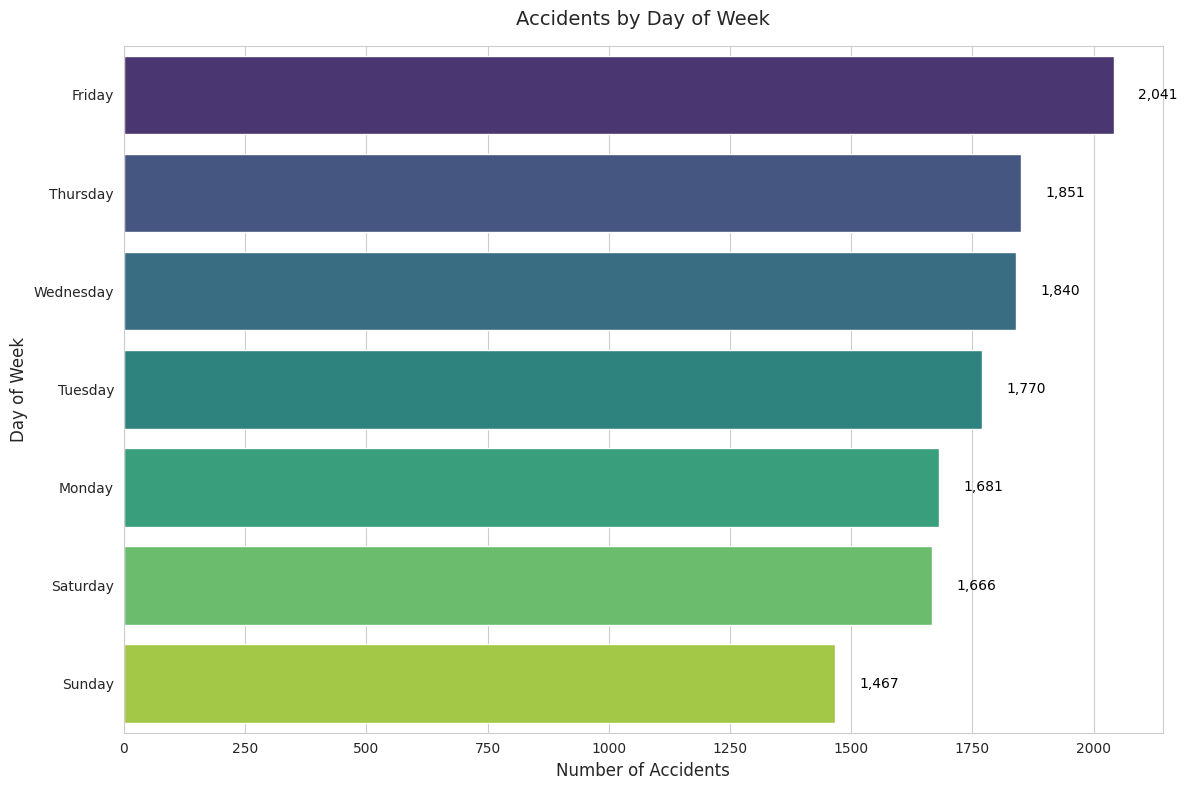

In [10]:

df_time = df.groupby('Day_of_week').size().reset_index(name='Accidents')
df_time = df_time.sort_values(by='Accidents', ascending=False)


plt.figure(figsize=(12, 8), dpi=100)
sns.set_style("whitegrid")
ax = sns.barplot(x='Accidents', y='Day_of_week', data=df_time, palette='viridis')

plt.title('Accidents by Day of Week', fontsize=14, pad=15)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i, v in enumerate(df_time['Accidents']):
    ax.text(v + 50, i, f'{v:,}', color='black', va='center', fontsize=10, ha='left')

plt.tight_layout()
plt.savefig('accidents_by_day.png', dpi=300, bbox_inches='tight')
plt.show()

<ipython-input-11-d901f2f822c1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Accidents', y='Accident_severity', data=df_severity, palette='viridis')


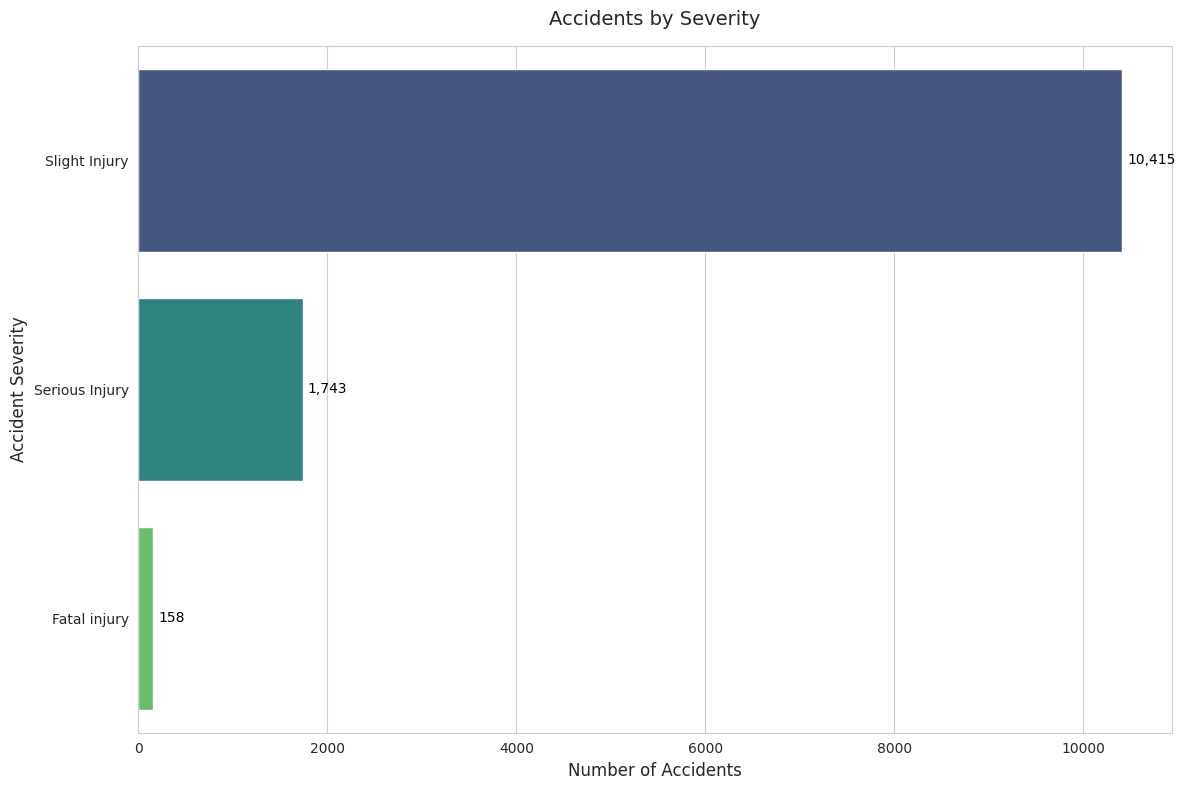

In [11]:

df_severity = df.groupby('Accident_severity').size().reset_index(name='Accidents')
df_severity = df_severity.sort_values(by='Accidents', ascending=False)

plt.figure(figsize=(12, 8), dpi=100)
sns.set_style("whitegrid")
ax = sns.barplot(x='Accidents', y='Accident_severity', data=df_severity, palette='viridis')

plt.title('Accidents by Severity', fontsize=14, pad=15)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Accident Severity', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i, v in enumerate(df_severity['Accidents']):
    ax.text(v + 50, i, f'{v:,}', color='black', va='center', fontsize=10, ha='left')

plt.tight_layout()
plt.savefig('accidents_by_severity.png', dpi=300, bbox_inches='tight')
plt.show()

<ipython-input-8-ef99f137497c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Accidents', y='Cause_of_accident', data=df_clean, palette='viridis')


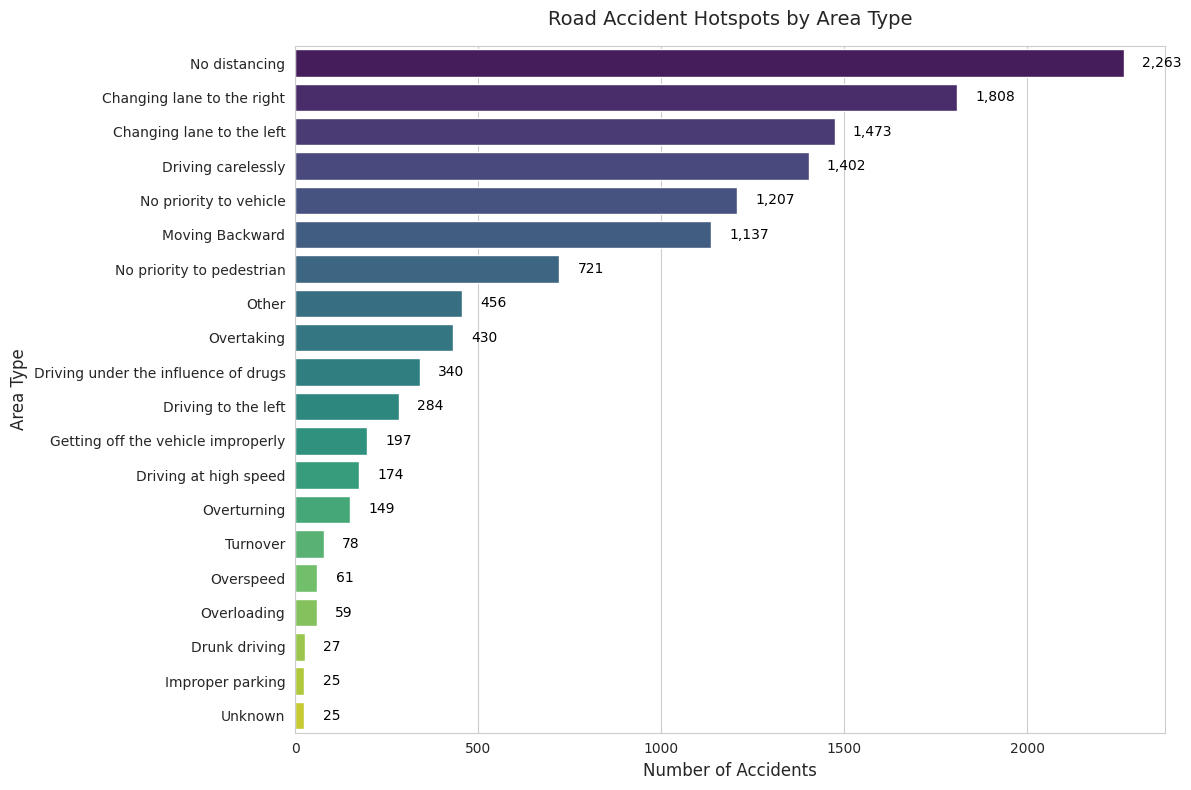

In [8]:

df_clean['Cause_of_accident'] = df_clean['Cause_of_accident'].astype(str)

plt.figure(figsize=(12, 8), dpi=100)
sns.set_style("whitegrid")

ax = sns.barplot(x='Accidents', y='Cause_of_accident', data=df_clean, palette='viridis')

plt.title('Road Accident Hotspots by Area Type', fontsize=14, pad=15)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Area Type', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i, v in enumerate(df_clean['Accidents']):
    ax.text(v + 50, i, f'{v:,}', color='black', va='center', fontsize=10, ha='left')

plt.tight_layout()
plt.savefig('accident_hotspots.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
if 'Area_accident_occured' not in df.columns:
    print("Error: 'Area_accident_occured' column not found. Available columns:", df.columns)
    raise KeyError("'Area_accident_occured' not found")

df_clean = df.groupby('Area_accident_occured').size().reset_index(name='Accidents')

df_clean = df_clean.sort_values(by='Accidents', ascending=False)

print("\nAggregated Data:")
display(df_clean)
print("\nData Types:")
print(df_clean.dtypes)


Aggregated Data:


,Area_accident_occured,Accidents
7,Other,3819
6,Office areas,3451
9,Residential areas,2060
2,Church areas,1060
4,Industrial areas,456
12,School areas,415
1,Recreational areas,327
5,Outside rural areas,218
3,Hospital areas,121
0,Market areas,63



Data Types:
Area_accident_occured    object
Accidents                 int64
dtype: object


<ipython-input-6-63e67cc20f24>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Accidents', y='Area_accident_occured', data=df_clean, palette='viridis')


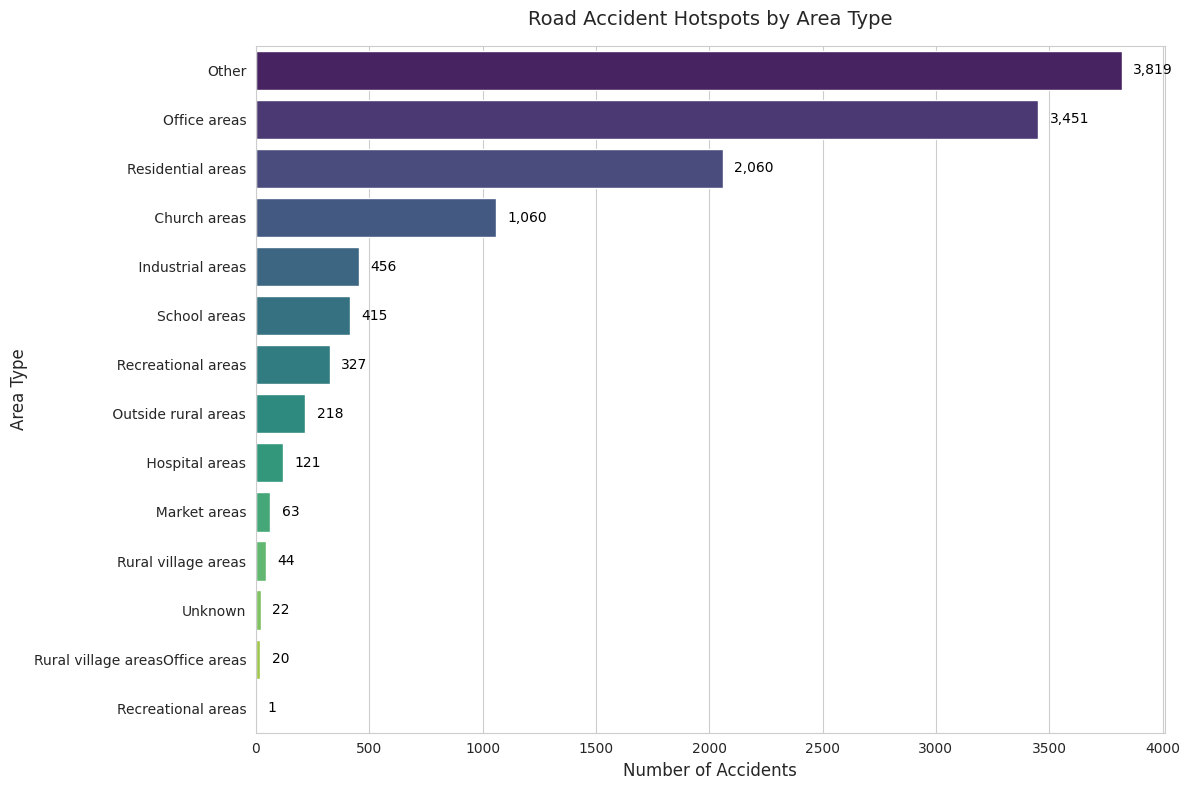

In [6]:

df_clean['Area_accident_occured'] = df_clean['Area_accident_occured'].astype(str)

plt.figure(figsize=(12, 8), dpi=100)
sns.set_style("whitegrid")

ax = sns.barplot(x='Accidents', y='Area_accident_occured', data=df_clean, palette='viridis')

plt.title('Road Accident Hotspots by Area Type', fontsize=14, pad=15)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Area Type', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i, v in enumerate(df_clean['Accidents']):
    ax.text(v + 50, i, f'{v:,}', color='black', va='center', fontsize=10, ha='left')

plt.tight_layout()
plt.savefig('accident_hotspots.png', dpi=300, bbox_inches='tight')
plt.show()